In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.animation import PillowWriter
from matplotlib import animation

In [104]:
n = 1000
r = np.random.random((2,n))
r_backup = r.copy()
onright = r[0]>0.5
onleft = ~onright
ids = np.arange(n)
id_pairs = np.asarray(list(combinations(ids,2)))

v = np.zeros((2,n))
v_backup = v.copy()
speed = 500
v[0][onleft] = speed
v[0][onright] = -speed
radius = 0.005

In [65]:
point_size_for_scatter = radius**2 * 250000

def plotit(axes):
    axes.clear()
    axes.grid()
    axes.set_xlim(0,1)
    axes.set_ylim(0,1)
    axes.scatter(r[0,onleft],r[1,onleft],c='blue',s=point_size_for_scatter)
    axes.scatter(r[0,onright],r[1,onright],c='red',s=point_size_for_scatter)

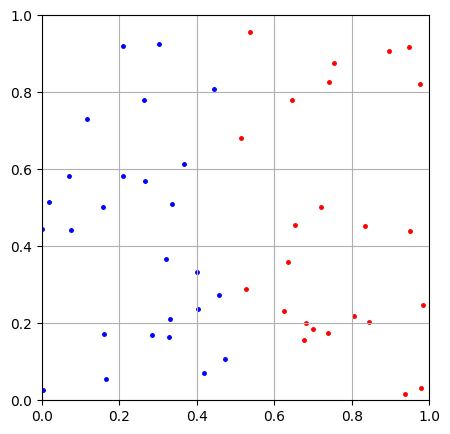

In [66]:
plt.figure(figsize=(5,5))
plotit(plt.gca())

Perfect elastic collision
\begin{align*}
\hat{n} &= \frac{\vec{r}_1-\vec{r}_2}{|\vec{r}_1-\vec{r}_2|}\\
\vec{v}_1^{new} &= \vec{v}_1 - ((\vec{v}_1-\vec{v}_2)\cdot\hat{n})\hat{n}\\
\vec{v}_2^{new} &= \vec{v}_2 + ((\vec{v}_1-\vec{v}_2)\cdot\hat{n})\hat{n}
\end{align*}

In [35]:
def update(dt):
    global r, v
    # position
    r = r + v*dt
    # check collision
    rx_paris = np.array([r[0][id_pairs[:,0]],r[0][id_pairs[:,1]]]).T
    ry_paris = np.array([r[1][id_pairs[:,0]],r[1][id_pairs[:,1]]]).T
    id_pairs_colliding = id_pairs[(np.diff(rx_paris).ravel()**2 + np.diff(ry_paris).ravel()**2) < 4*radius**2]

    # handle collision
    v1 = v[:,id_pairs_colliding[:,0]]
    v2 = v[:,id_pairs_colliding[:,1]]
    r1 = r[:,id_pairs_colliding[:,0]]
    r2 = r[:,id_pairs_colliding[:,1]]
    nhat = (r1-r2)/np.sum((r1-r2)**2,axis=0)**.5
    deltav = np.sum((v1-v2)*nhat,axis=0)*nhat
    v[:,id_pairs_colliding[:,0]] = v1 - deltav
    v[:,id_pairs_colliding[:,1]] = v2 + deltav

    # check for bounds
    v[0,(r[0]<0)+(r[0]>1)] *= -1
    v[1,(r[1]<0)+(r[1]>1)] *= -1

$$
\frac{m}{kT} = \frac{2}{<v>^2}
$$
$$
\frac{m}{kT}ve^{-\frac{m}{kT}\frac{v^2}{2}}
$$

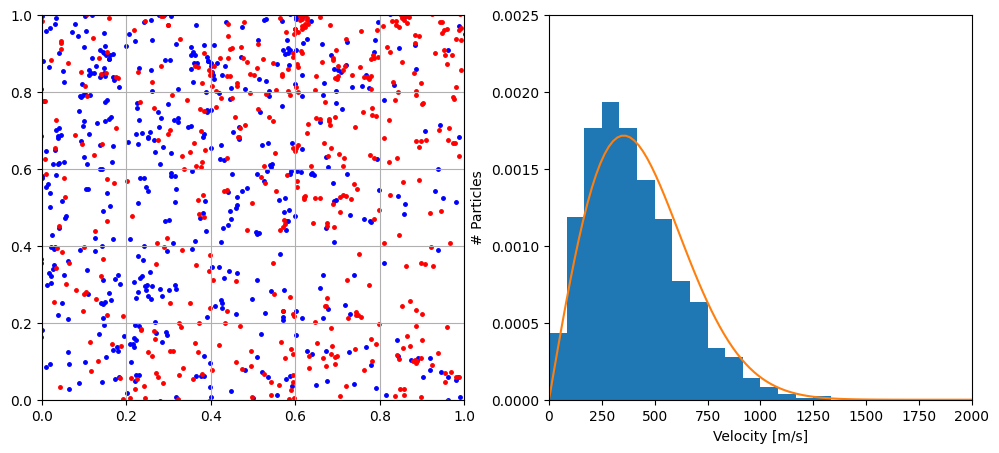

In [105]:
dt = 0.00001
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax1 = ax[0]
ax2 = ax[1]
def anim(i):
    update(dt)

    # plot points, left part
    plotit(ax1)
    # plot right part
    ax2.clear()
    c = 2/speed**2
    var_v = np.linspace(0,4*speed, 100)
    f = c*var_v*np.exp(-c*var_v**2/2)
    bins = np.linspace(0,4*speed,25)
    ax2.set_ylim(0,0.0025)
    ax2.set_xlim(0,4*speed)
    ax2.hist(np.sqrt(np.sum(v**2, axis=0)), bins=bins, density=True)
    ax2.plot(var_v,f)
    ax2.set_xlabel('Velocity [m/s]')
    ax2.set_ylabel('# Particles')
    return fig

ani = animation.FuncAnimation(fig, anim, frames=300)
ani.save('ani4.gif', writer='pillow',fps=20,dpi=100)

Text(0, 0.5, '# Particles')

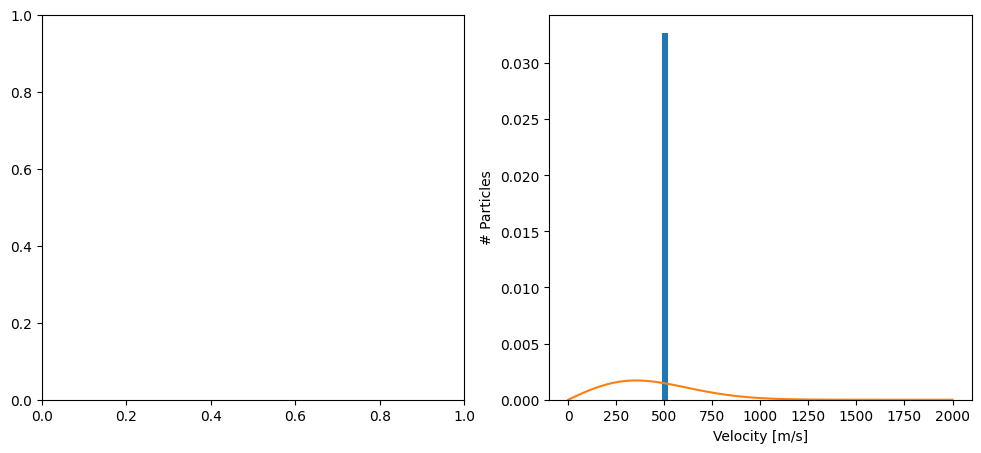

In [81]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax = ax[0]
ax2 = ax[1]
c = 2/speed**2
var_v = np.linspace(0,4*speed, 100)
f = c*var_v*np.exp(-c*var_v**2/2)
bins = np.linspace(0,4*speed,50)
ax2.hist(np.sqrt(np.sum(v**2, axis=0)), bins=bins, density=True)
ax2.plot(var_v,f)
ax2.set_xlabel('Velocity [m/s]')
ax2.set_ylabel('# Particles')